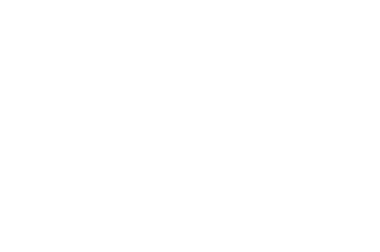

In [4]:
# Code for automatically downloading .IMG files and converting them to .png files  which can further be used to make dataset for the machine learning model
from bs4 import BeautifulSoup
import urllib.request
import re
import requests
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
from PIL import Image
from pylab import *
url="https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA/2011_157/"#importing the url of the directory we want to download
html_page = urllib.request.urlopen(url)
soup = BeautifulSoup(html_page)
i=0#counts 
for link in soup.findAll('a'):
    if(re.search(".*IMG$", link.get('href'))):
#         print(link)
        i=i+1
#         print(link.get('href'))
        URL=url+link.get('href')
        r = requests.get(URL, allow_redirects=True)
        open('google.IMG', 'wb').write(r.content)
        input_filename = "google.IMG"

        dtype = np.dtype('>u2')
        fid = open(input_filename, 'rb')
        data = np.fromfile(fid, dtype)
#         print(np.shape(data))
        da=np.shape(data)
        da2=int(sqrt(da[0]))
#         print(da2)
        j=da2
        da3=0
        while(j>0):
            if (da[0]%j==0):
#                 print(j)
                da3=int(da[0]/j)
                break
            j=j-1
                
            
#         p=int(da[0]/512)

        shape = (da3, j)
        image = data.reshape(shape)
        # print(image)
#         plt.imshow(image)
        axis("off")
        plt.imsave("image156"+str(i)+".png",image,cmap="gray")
        # plt.imsave("dff2222.png",image)
#         print(i)